Раскидывание данных для первого водителя по массивам:

In [1]:
%matplotlib inline
import pandas
import math
import matplotlib.pyplot as plt
import re
import datetime
import sort_coordinates

data = pandas.read_csv('data1.tsv', sep="\t")
id_unique = data["id"].unique()
date_points = []
lat_points = []
lon_points = []
format_date = "%Y-%m-%d %H:%M:%S"

for i in id_unique:
    str_date = data[data["id"] == i]["date"].copy()
    datepstr = []
    for s in str_date:
        t = datetime.datetime.strptime(s, format_date)
        datepstr.append(t)
    date_points.append(datepstr)
    lat = sort_coordinates.del_invalid_idx(data[data["id"] == i]["latitude"].copy())
    lat_points.append(lat)
    lon = sort_coordinates.del_invalid_idx(data[data["id"] == i]["longitude"].copy())
    lon_points.append(lon)

Нужно придумать как определять число остановок и предварительно разделить маршрут на 2 части - в одну и в другую сторону.

In [2]:
import rounds
lat = []
lon = []
timestamps = []
for i in range(len(lon_points)):
    x, y, time = rounds.div_rounds(lat_points[i], lon_points[i], date_points[i]);
    for idx in range(len(x)):
        lat.append(x[idx])
        lon.append(y[idx])
        timestamps.append(time[idx])
len_data_round =  len(lat)

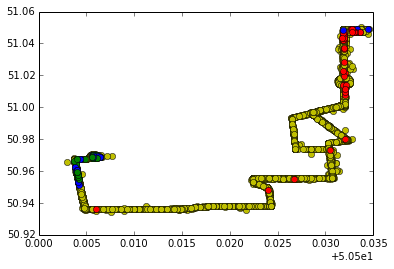

In [3]:
plt.plot(data["latitude"], data["longitude"], 'o', c = 'y')

j = 30
plt.plot(lat[0][0], lon[0][0], 'o', c = 'g')
for j in range(len(lat)-1):
    i = 0
    plt.plot(lat[j][0], lon[j][0], 'o', c = 'g')
    i=int((len(lat[j])-1)/2)
    plt.plot(lat[j][i], lon[j][i], 'o', c = 'r')
    i=(len(lat[j])-1)
    plt.plot(lat[j][i], lon[j][i], 'o', c = 'b')

Этот график проверка, что данные отделяются верно. Ещё не много стоит его доработать.

In [4]:
from speed import find_speed

speeds = []
for i in range(len_data_round - 1):
    speeds.append(find_speed(lat[i], lon[i], timestamps[i]))

In [5]:
for i in range(10):
        print(speeds[1][i]*100000)

7.606007088290848
13.017408379488728
5.895932475283166
9.267839404211102
5.139352628958706
10.517146367252954
11.943125637793928
4.011562801590841
4.255139906628979
6.062429381032607


Думаю, что минимальный порог 4 будет оптимальным.

In [6]:
from rounds import min_speed_points

points_x = []
points_y = []
speed_points = []
for i in range(len(lat) - 1):
    point_x, point_y, speed = min_speed_points(lat[i], lon[i], speeds[i])
    points_x.append(point_x)
    points_y.append(point_y)
    speed_points.append(speed)

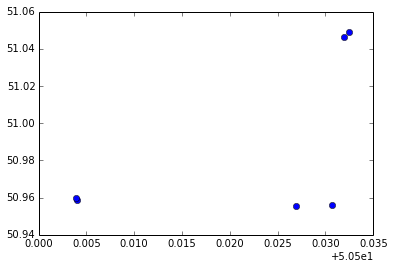

In [12]:
#for i in range(len(points_x) - 1):
plt.plot(points_x[0], points_y[0], 'o', c = 'b')